# HR Analytics Project- Understanding the Attrition in HR

**Problem Statement:**

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

**HR Analytics**

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

**Attrition in HR**

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

**Attrition affecting Companies**

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install mlrose

In [3]:
df = pd.read_csv("C:/Users/Jeet Sarkar/Data Science PG Program/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Univeriate Analysis

In [12]:
col = ['Attrition','BusinessTravel','Department','Education','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime',
     'DistanceFromHome','EmployeeNumber','EnvironmentSatisfaction','JobInvolvement','JobLevel','NumCompaniesWorked','PerformanceRating',
     'RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
     'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

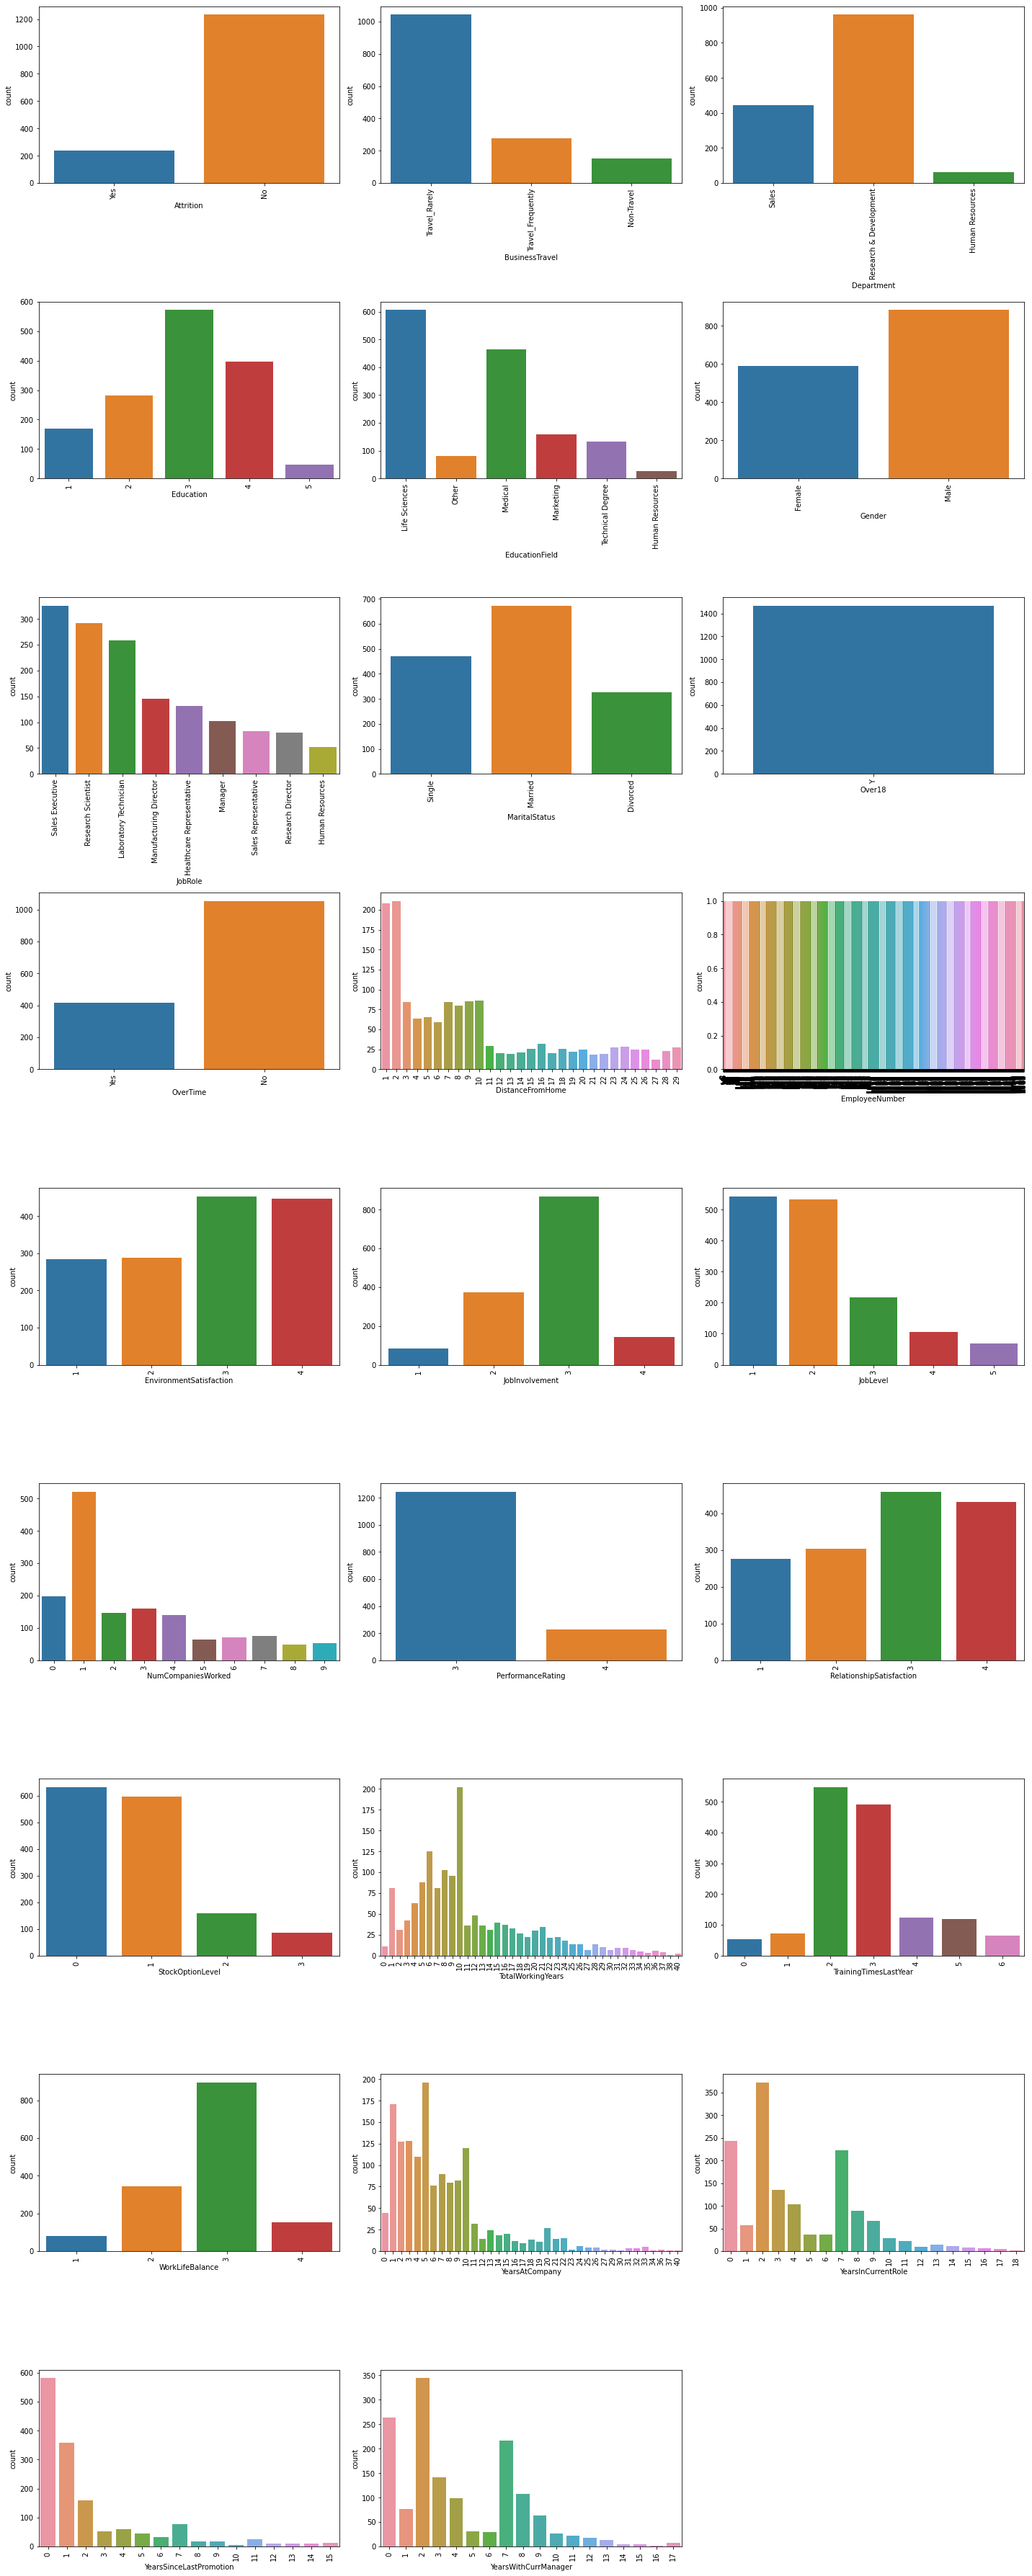

In [13]:
plt.figure(figsize=(20,55))
for i in range(len(col)):
    plt.subplot(10,3,i+1)
    sns.countplot(df[col[i]])
    plt.xticks(rotation=90)
    plt.tight_layout()

# Observation

1. From attrition i can say no has more count compair to yes
2. From Business travel i can say most of the peoples in the company are those who Travel rarely then yhose who travel frequently and then no travel.
3. From Department i can say most of the peoples are from research and development then sales and then human resources.
4. From Education no.3 has high count means most of the peoples are average educated and no.5 is less means there are less peopl who are highly educated just like PHD.
5. From education field i can say people are from Life sciences compare are more as compare to others.
6. From Gender i can say males are more then females.
7. From job role i can say sale executive are more then all others may be good sales incentive.
8. From Material Status i can say married peoples are more then others.
9. From over18 i cab say all peoples are metured.
10. From overtime i can say most of people are not intrested in doing overtime.
11. From Distance from home i can say most of peoples are live near the company.
12. From Environmentsatisfaction i can say 50% people satisfied and 50% peoples are not satisfied (mixed result).
13. From job envolvement no.3 has highest count.
14. From job level 1 and 2 has more count then other.
15. From performance rating i can say 3 has more count then 4.
16. From Relationship satisfaction i can say 3 has more count then other.
17. From yearsatcompany there are peoples who mostly work for 10 years and some peoples who work more then 10 years.
18. From total working years i can say most of the people have 10 years experiance and less people who have greater than 10 years of experiance.
19. From YearsSinceLastPromotion i can say mostly all people get promotion within 1-3 years.

# Checking Distribution curve of continuous columns

In [14]:
num_cols = ['MonthlyIncome', 'MonthlyRate', 'DailyRate']

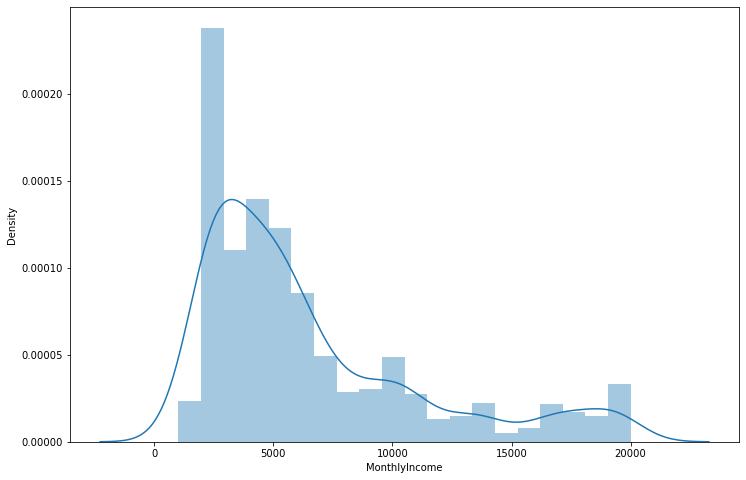

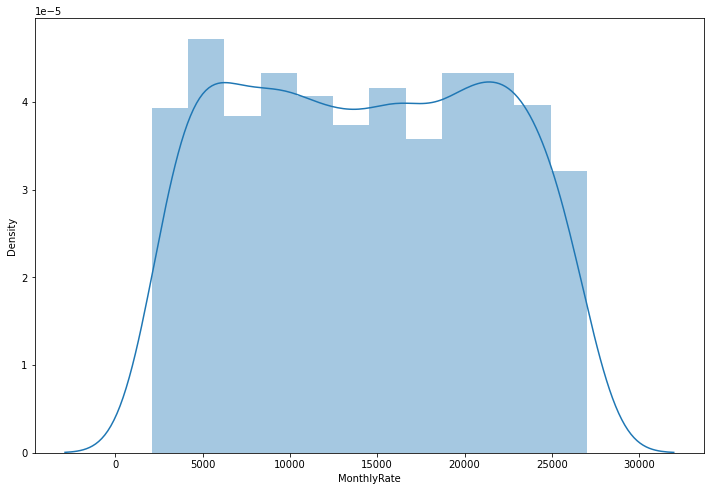

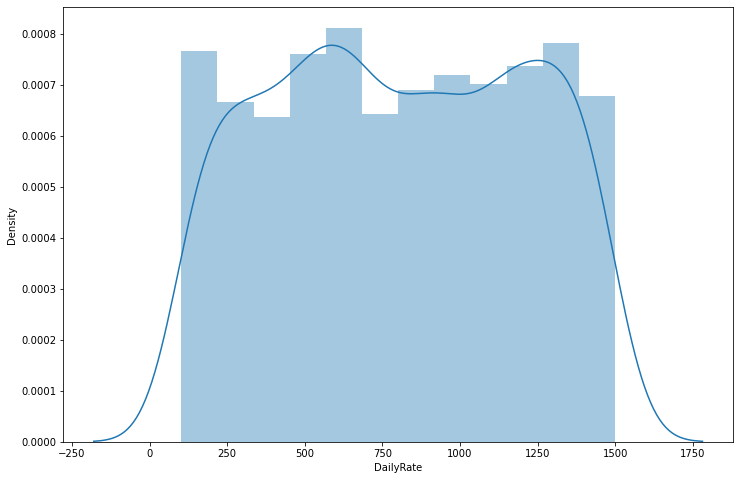

In [15]:
for i in range(len(num_cols)):
    plt.figure(figsize=(12,8))
    sns.distplot(df[num_cols[i]])
    plt.show()

# Observation

From upper graph i can say Monthly Income is highly skewed and other have middle high peak.

# Bevariate Analysis

In [16]:
cols=['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

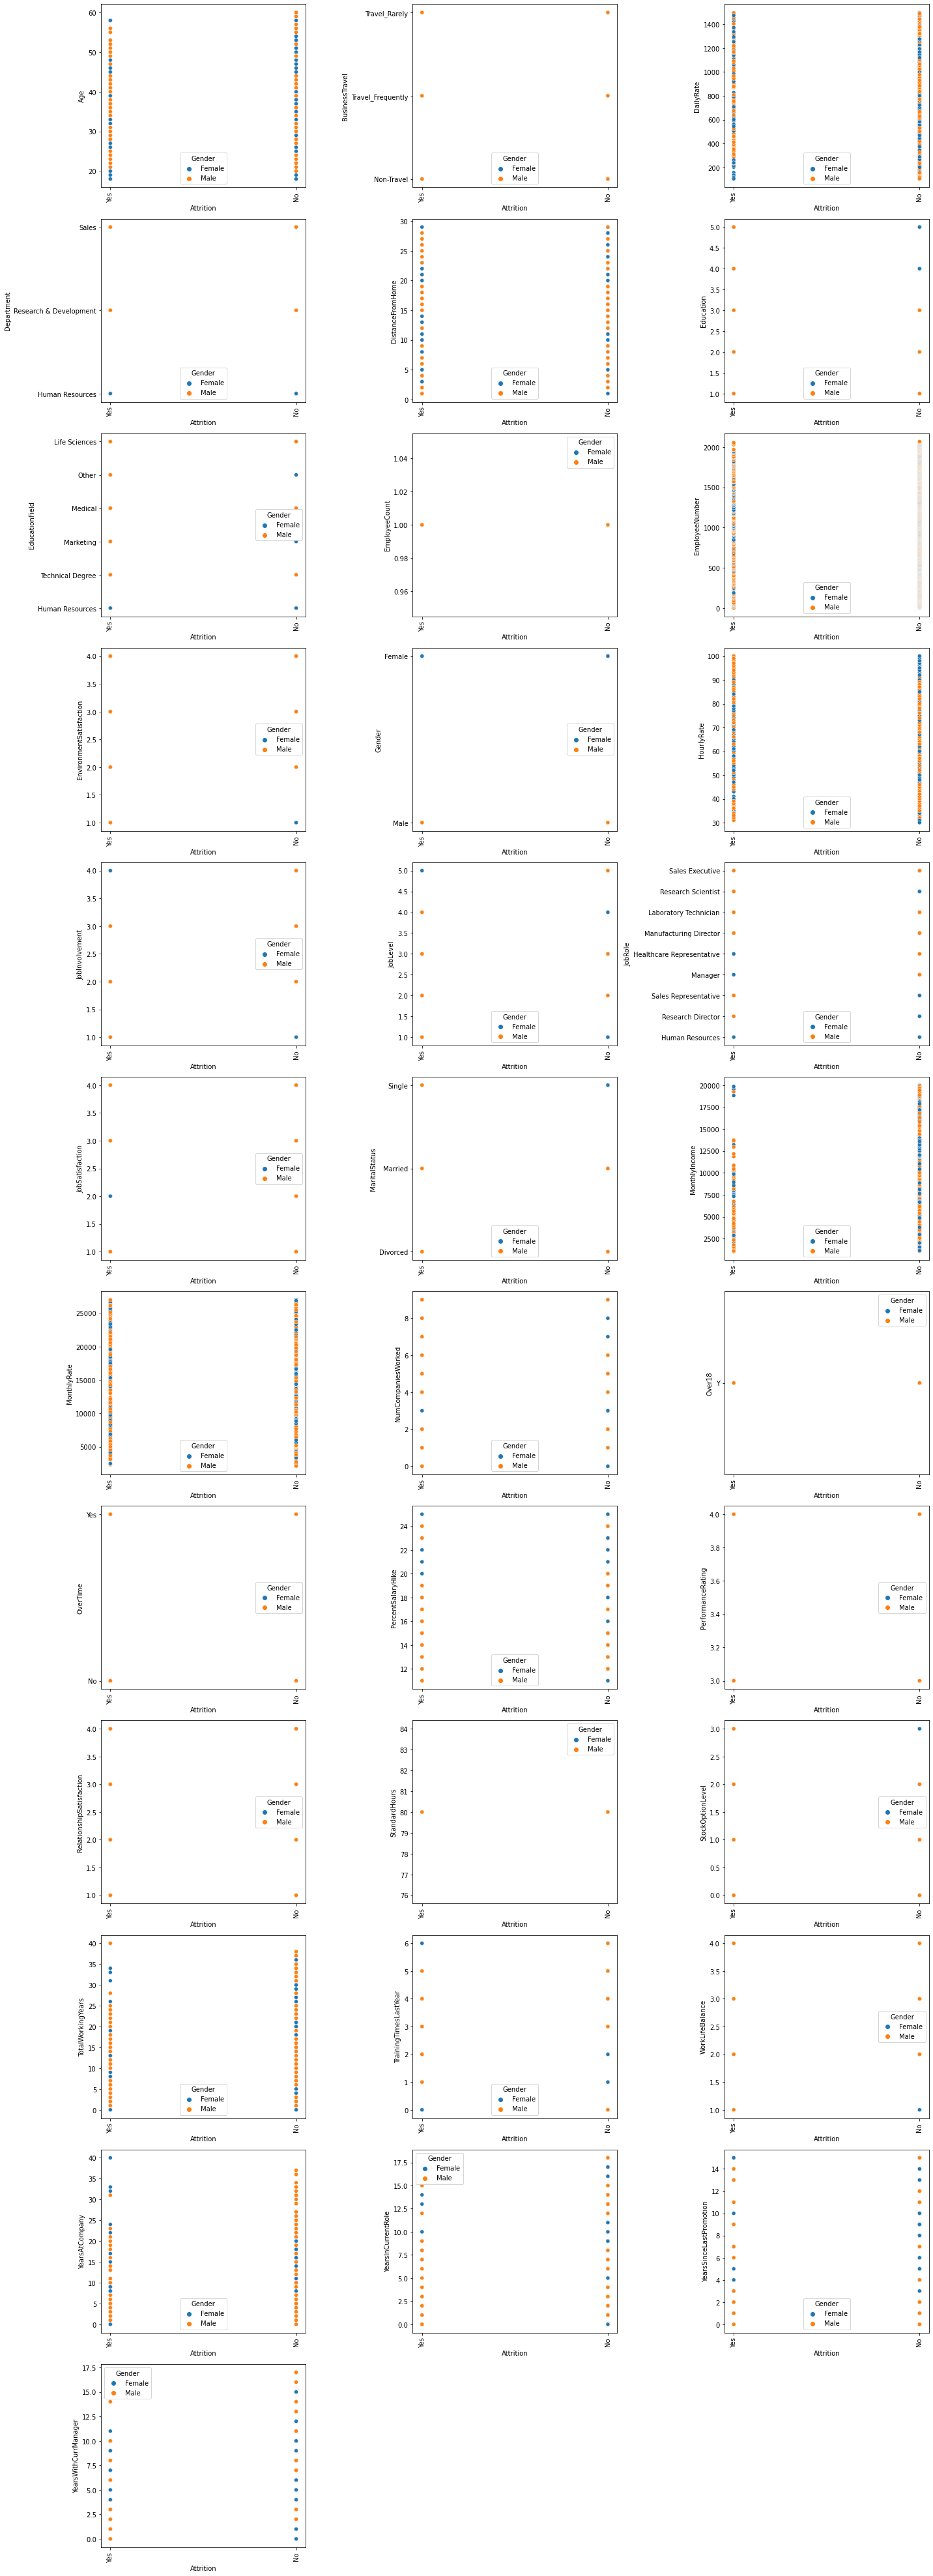

In [17]:
plt.figure(figsize=(20,55))
for i in range(len(cols)):
    plt.subplot(12,3,i+1)
    sns.scatterplot(x=df['Attrition'], y=df[cols[i]], hue=df['Gender'])
    plt.xticks(rotation=90)
    plt.tight_layout()

# Observation

From upper graph i can say the quantity of male are high as compare to females in most of every feature.

In [18]:
male_data = df.loc[df['Gender']=='Male'].set_index('YearsAtCompany')
female_data = df.loc[df['Gender']=='Female'].set_index('YearsAtCompany')

<AxesSubplot:xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

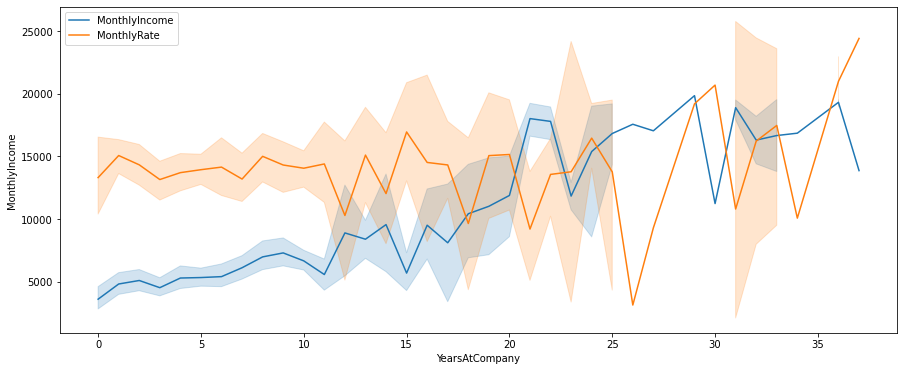

In [19]:
plt.figure(figsize=(15,6))
sns.lineplot(data=male_data['MonthlyIncome'], label='MonthlyIncome')
sns.lineplot(data=male_data['MonthlyRate'], label='MonthlyRate')

# Observation

From upper graph i can say the years increasing the more salary and high monthly rate you have.

<AxesSubplot:xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

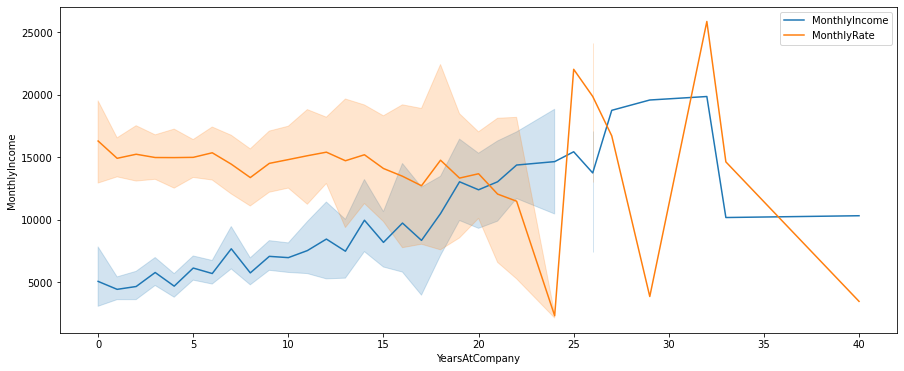

In [20]:
plt.figure(figsize=(15,6))
sns.lineplot(data=female_data['MonthlyIncome'], label='MonthlyIncome')
sns.lineplot(data=female_data['MonthlyRate'], label='MonthlyRate')

# Observation

From upper graph i can say as the time increasing rate and income also increasing

<AxesSubplot:xlabel='YearsAtCompany', ylabel='DailyRate'>

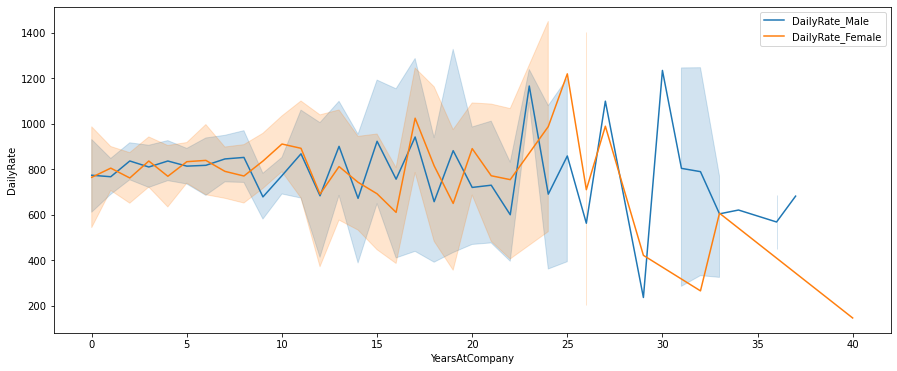

In [21]:
plt.figure(figsize=(15,6))
sns.lineplot(data=male_data['DailyRate'], label='DailyRate_Male')
sns.lineplot(data=female_data['DailyRate'], label='DailyRate_Female')

# Observation

From upper graph i can say before 30 year female have more daily rate but after 30 year man have more daily rate.

In [22]:
df1=df.groupby('Age')['MonthlyIncome'].sum()
df1 = df1.reset_index()
df1 = df1.sort_values(by=['MonthlyIncome'], ascending=False)

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

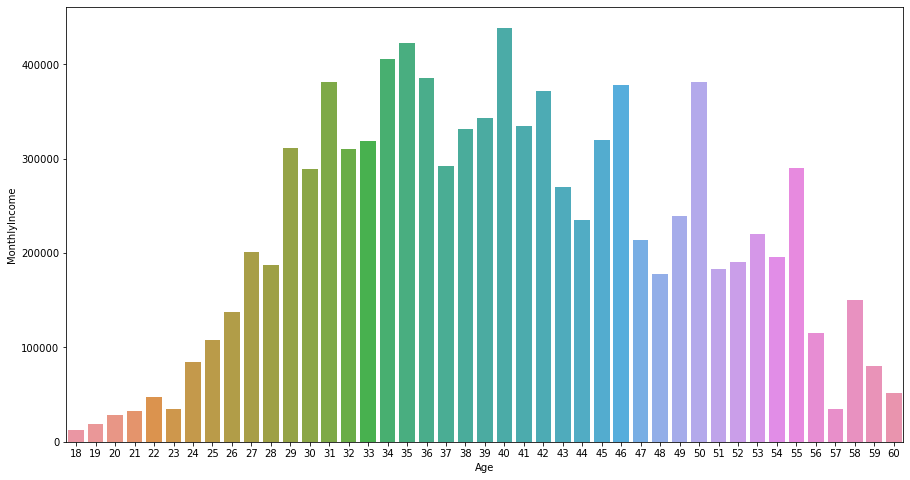

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age', y='MonthlyIncome', data=df1)

# Observation

From upper graph i can say age 40 has the highest salary and 18-23 & 57-60 has less salary.

In [24]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Text(0.5, 1.0, 'Department wise monthlyincome on bases of educationfield')

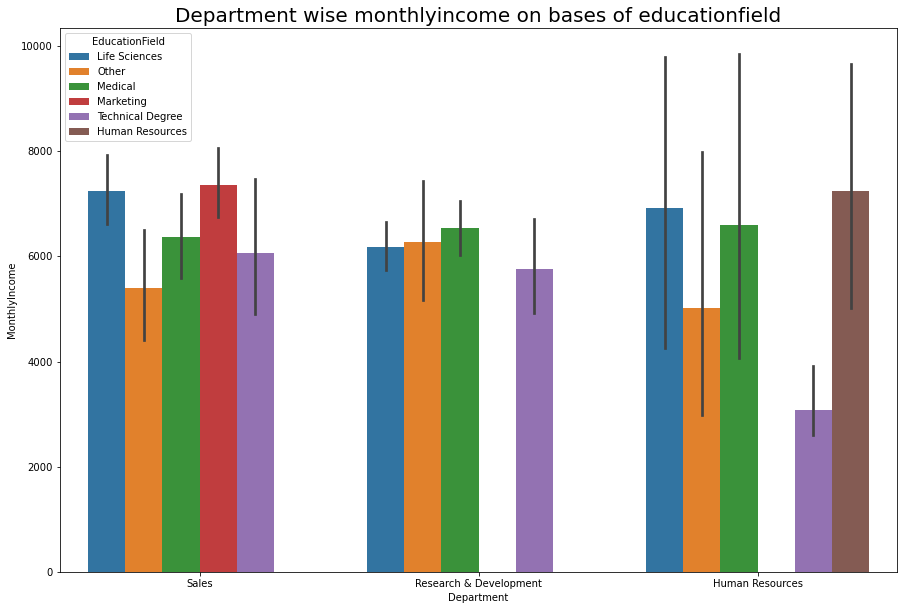

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(x='Department',y='MonthlyIncome', data=df, hue='EducationField')
plt.title('Department wise monthlyincome on bases of educationfield',fontsize=20)

# Observation

1. From sales department i can say life science field has the high salary and other has less salary.
2. From Research & Development department i can say Medical field has high salary and other have less salary.
3. From Human Resource department i can say Human Resources field has the high salary and other has less salary.


<AxesSubplot:xlabel='BusinessTravel', ylabel='MonthlyIncome'>

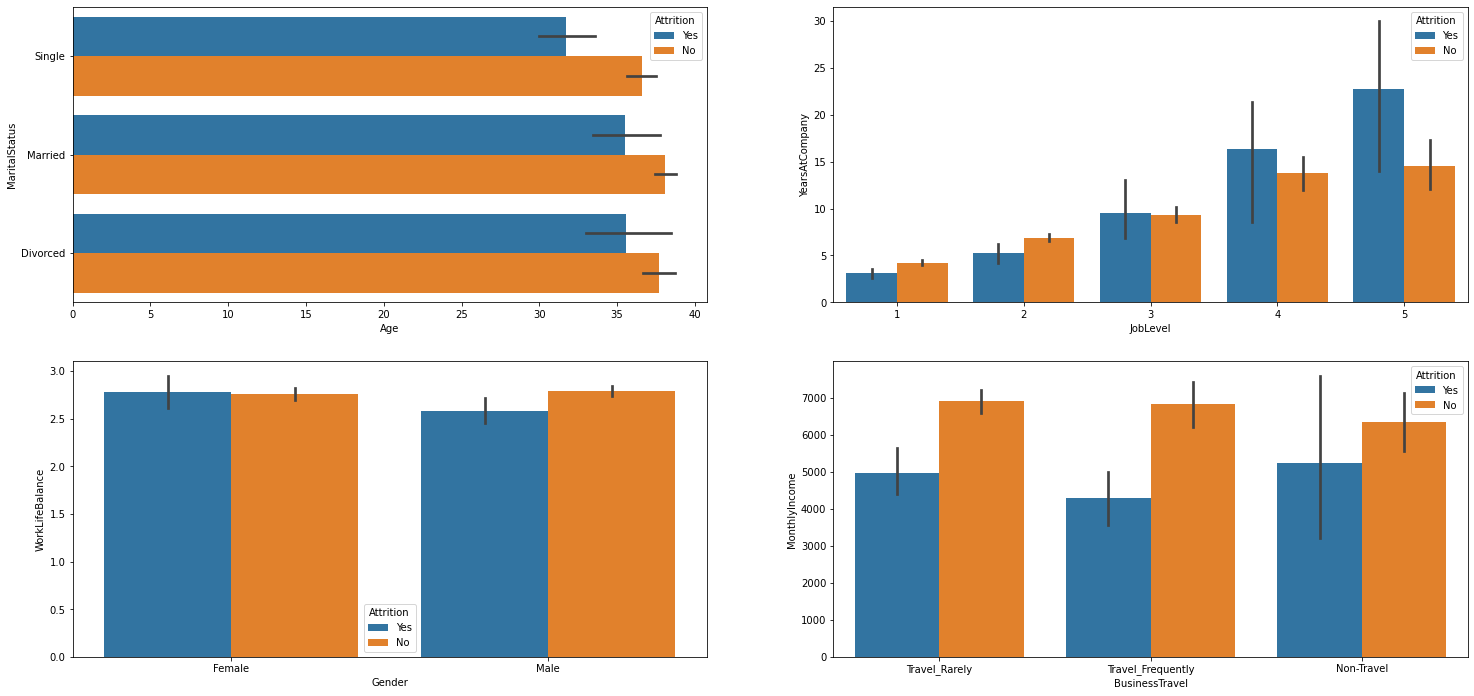

In [26]:
plt.figure(figsize=(25,25))
plt.subplot(4,2,1)
sns.barplot(y='MaritalStatus',x='Age',data=df,hue='Attrition')
plt.subplot(4,2,2)
sns.barplot(y='YearsAtCompany',x='JobLevel',data=df,hue='Attrition')
plt.subplot(4,2,3)
sns.barplot(y='WorkLifeBalance',x='Gender',data=df,hue='Attrition')
plt.subplot(4,2,4)
sns.barplot(y='MonthlyIncome',x='BusinessTravel',data=df,hue='Attrition')

# Observation

1. From Maritalstatus and age i can say attrition no is high as compare to yes
2. From Yearsatcompany and job level i can say attrition yes is high  that means people have really did hardwork to reach at this position.
3. From worklifebalance and gender i can say attrition yes of female is high compare to male attrition.
4. From MonthlyIncome and BusinessTravel i can say attrition no has more cont compare to others.

# Selecting only object columns to encode them

In [27]:
df_ibj = df.select_dtypes(include=['object'])

In [28]:
df_ibj

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [29]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

# I am using ordinalencoder because all of the columns are in order so its good to transform them into order

In [30]:
def ordinal_encoder(df,column):
    df[column]=oe.fit_transform(df[column])
    return df

In [31]:
df1=ordinal_encoder(df,['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'])

In [32]:
def preprocessing(df):
    df=df.copy()
    X=df.drop('Attrition', axis=1)
    y=df['Attrition']
    return X,y

In [33]:
X,y=preprocessing(df)

In [34]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2.0,591,1.0,2,1,3.0,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,23,2,3.0,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2.0,613,1.0,6,1,3.0,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2.0,155,1.0,4,3,1.0,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1.0,1023,2.0,2,3,3.0,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [35]:
X.drop(['StandardHours','EmployeeNumber','Over18'],axis=1, inplace=True)

I droped all this columns because they were not usefull over18 and standardname have only one value and employeenumber having only unique incremented values

# Multivariate Analysis

<AxesSubplot:>

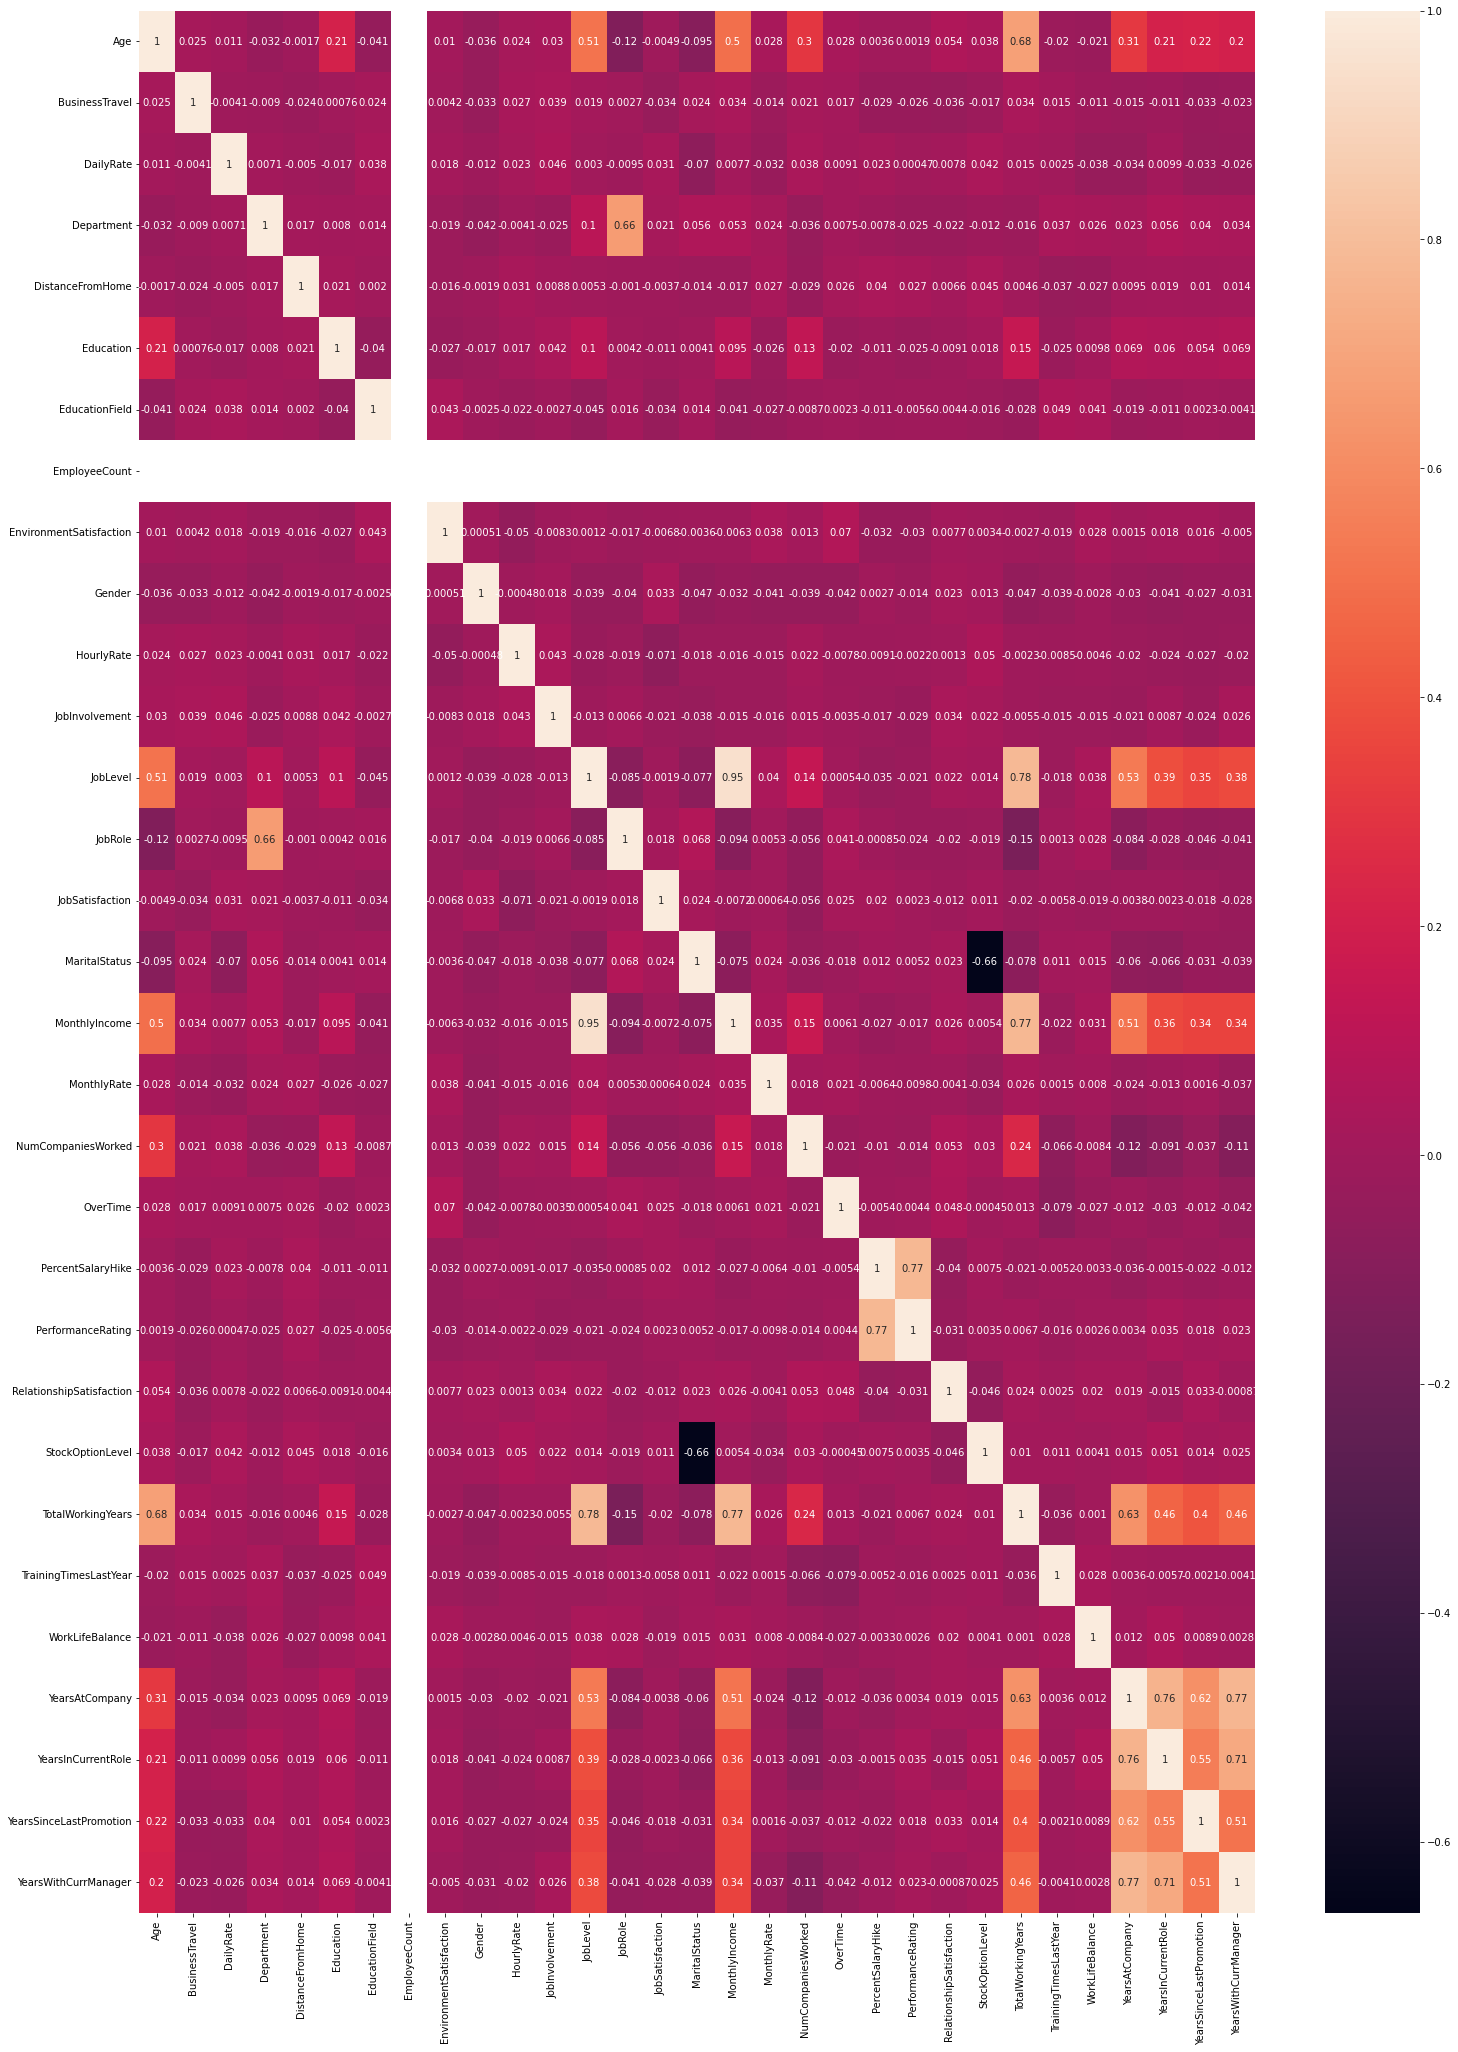

In [36]:
plt.figure(figsize=(25,35))
sns.heatmap(X.corr(),annot=True)

Some columns are really having good correlation like 80% annd 70% if two columns might be having 90% then i had to drop one column but in this data no one is having more then 90

# Checking Outliers

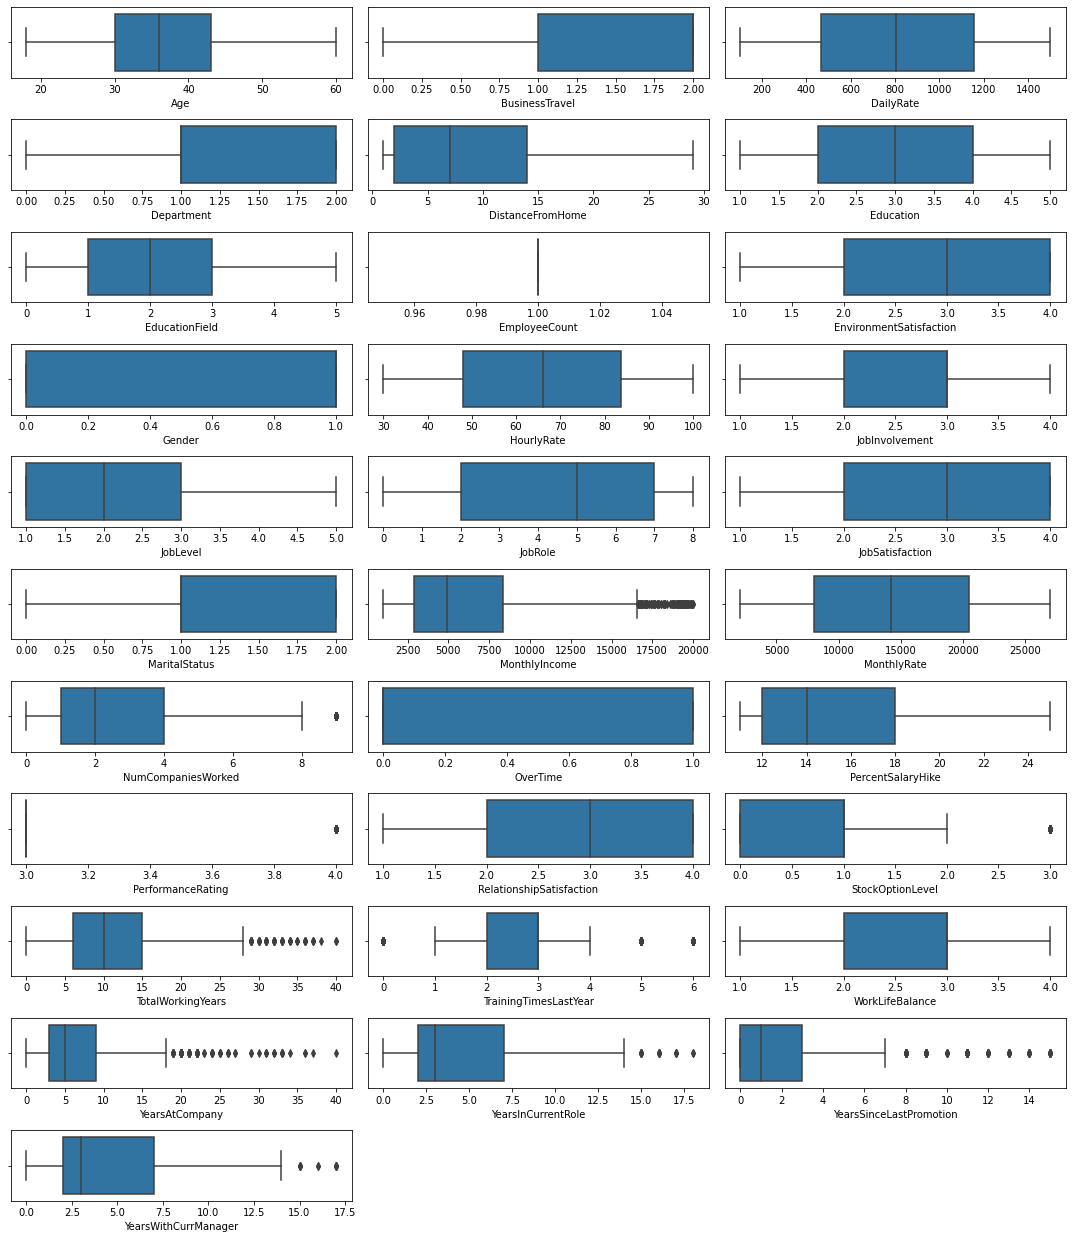

In [37]:
plt.figure(figsize=(15,20))
for i in range(len(X.columns.values)):
    plt.subplot(13,3,i+1)
    sns.boxplot(X[X.columns.values[i]])
    plt.tight_layout()

Outliers are present lets try to remove them

# Replacing outliers with percentile method so we dont loose data

In [38]:
for col in X.columns:
    percentile=X[col].quantile([0.01,0.98]).values
    X[col][X[col]<=percentile[0]]=percentile[0]
    X[col][X[col]>=percentile[1]]=percentile[1]

# After revoing outliers

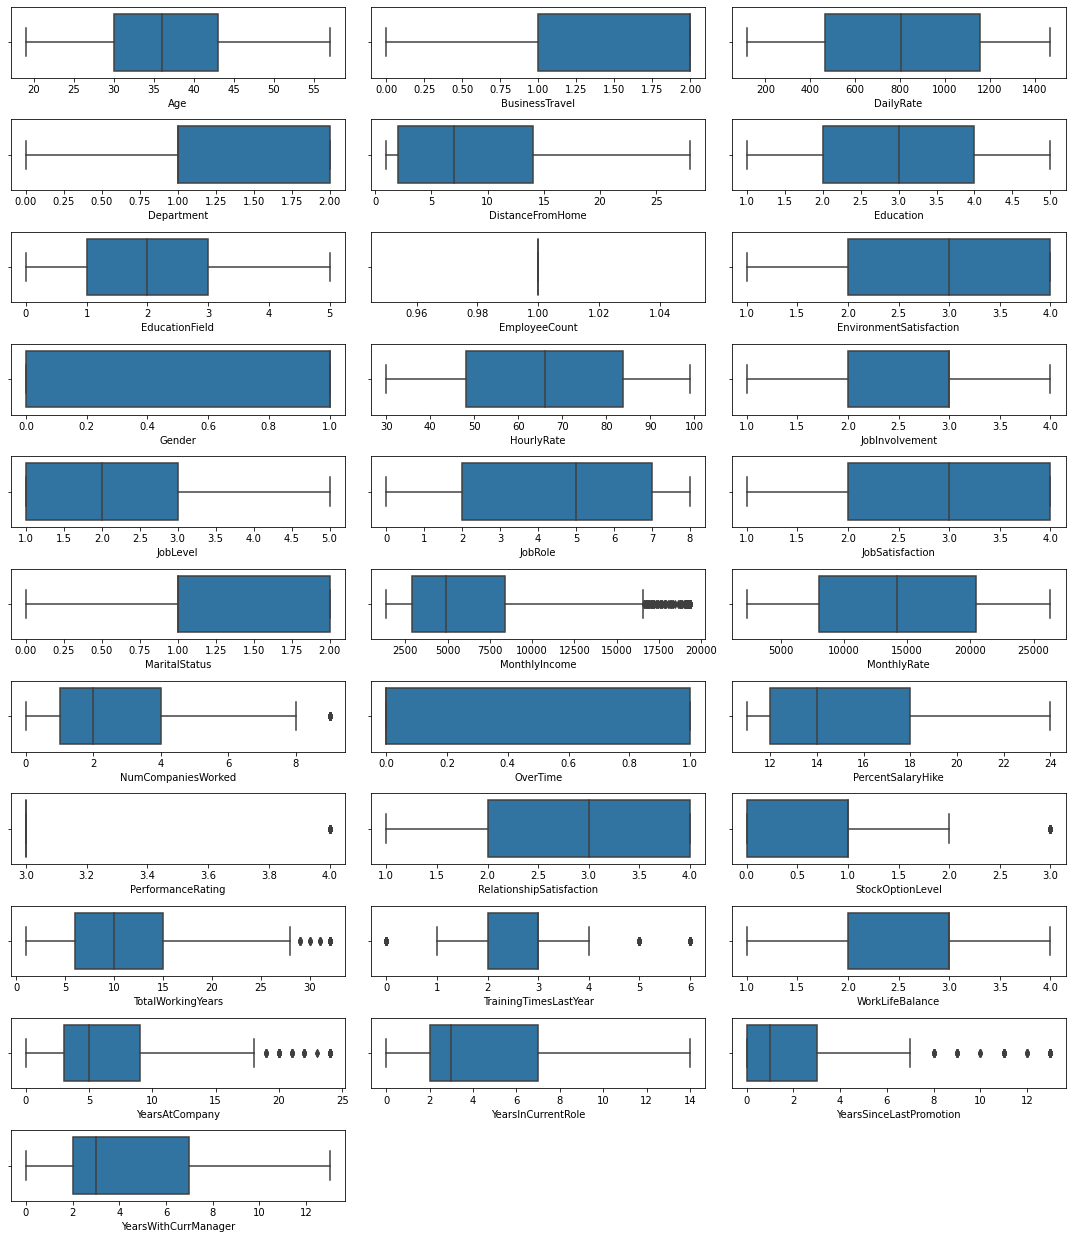

In [39]:
plt.figure(figsize=(15,20))
for i in range(len(X.columns.values)):
    plt.subplot(13,3,i+1)
    sns.boxplot(X[X.columns.values[i]])
    plt.tight_layout()

Outliers have been removed easily

In [40]:
# !pip install pingouin

In [41]:
import pingouin as pg

In [42]:
pg.linear_regression(X,y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,7.133815e-01,0.130300,5.474918,5.157883e-08,0.213732,0.19734,0.457783,0.968980
1,Age,-3.739694e-03,0.001364,-2.741100,6.199161e-03,0.213732,0.19734,-0.006416,-0.001063
2,BusinessTravel,-5.415539e-04,0.013027,-0.041571,9.668466e-01,0.213732,0.19734,-0.026096,0.025013
3,DailyRate,-3.249154e-05,0.000022,-1.504479,1.326775e-01,0.213732,0.19734,-0.000075,0.000010
4,Department,5.633916e-02,0.022706,2.481288,1.320434e-02,0.213732,0.19734,0.011800,0.100879
5,DistanceFromHome,3.500960e-03,0.001076,3.254891,1.160724e-03,0.213732,0.19734,0.001391,0.005611
6,Education,-1.504162e-04,0.008662,-0.017365,9.861477e-01,0.213732,0.19734,-0.017142,0.016841
7,EducationField,5.532743e-03,0.006512,0.849590,3.956943e-01,0.213732,0.19734,-0.007242,0.018307
8,EnvironmentSatisfaction,-4.083757e-02,0.007940,-5.143573,3.067104e-07,0.213732,0.19734,-0.056412,-0.025263
9,Gender,3.583649e-02,0.017717,2.022719,4.328674e-02,0.213732,0.19734,0.001083,0.070590


Mostly all the columns are giving me good p value as compare to linear_regression but some are not but they might be related in other way if i do some other test

# Checking skewness

In [43]:
X.skew()

Age                         0.382046
BusinessTravel             -1.439006
DailyRate                  -0.006666
Department                  0.172231
DistanceFromHome            0.941426
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.035742
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.360261
MonthlyRate                 0.013541
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.786109
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.005793
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

There is skewness in data lets remove it

In [44]:
from sklearn.preprocessing import power_transform, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

In [45]:
x=X

# Removing Skewness

In [46]:
x_new=power_transform(X, method='yeo-johnson')
x_new=pd.DataFrame(x_new,columns=x.columns)

# The dataset is imbalanced so i need to balance it

In [47]:
!pip install --user imblearn

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(x_new,y)
x_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Attrition'])

In [50]:
x_new.skew()

Age                         0.077296
BusinessTravel             -0.919244
DailyRate                  -0.121777
Department                 -0.040344
DistanceFromHome           -0.146592
Education                  -0.144921
EducationField             -0.016873
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.087316
Gender                     -0.506667
HourlyRate                 -0.066714
JobInvolvement             -0.003618
JobLevel                    0.363819
JobRole                    -0.319380
JobSatisfaction            -0.094641
MaritalStatus              -0.398860
MonthlyIncome               0.000000
MonthlyRate                -0.190038
NumCompaniesWorked          0.051821
OverTime                    0.415665
PercentSalaryHike           0.160920
PerformanceRating           0.000000
RelationshipSatisfaction   -0.149978
StockOptionLevel            0.403481
TotalWorkingYears           0.025219
TrainingTimesLastYear      -0.016583
WorkLifeBalance             0.012558
Y

Skewness is been removed

# Seeing the difference between imbalanced and balanced data

Text(0.5, 1.0, 'Balanced data')

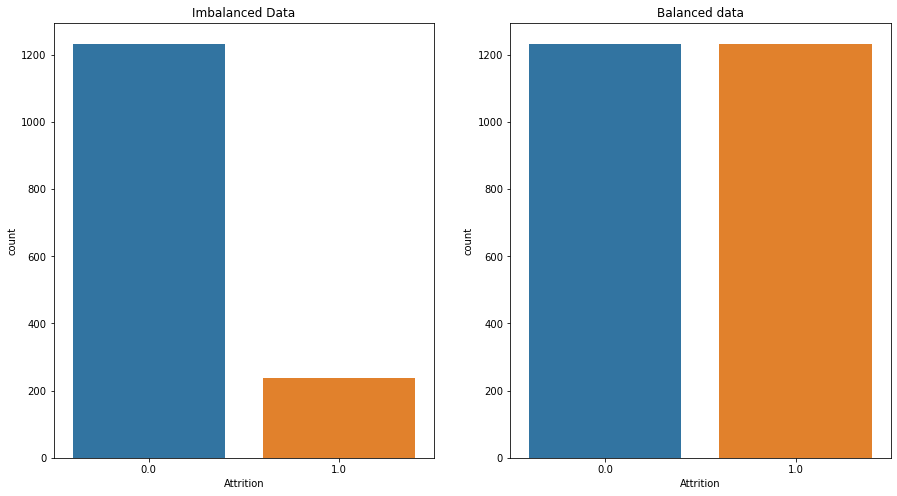

In [51]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(df['Attrition'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['Attrition'])
plt.title("Balanced data")

# Feature Scaling

In [52]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x_new)
x_new=pd.DataFrame(x_new,columns=(x.columns))

In [53]:
X_train,X_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.3,random_state=42)

In [54]:
# !pip install xgboost

In [55]:
# !pip install --user yellowbrick

In [56]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import scikitplot as skplt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from yellowbrick.classifier.rocauc import roc_auc

In [57]:
skf=StratifiedKFold(n_splits=5)

# Training multiple models

In [58]:
models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreesClassifier':ExtraTreesClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'XGBClassifier':XGBClassifier()
}

******************************************** LogisticRegression *****************************************************


Accuracy Score: 0.7783783783783784


SCORE: 0.7783783783783784


Confusion Matrix:


[[284  85]
 [ 79 292]]


Classification Report:


              precision    recall  f1-score   support

         0.0       0.78      0.77      0.78       369
         1.0       0.77      0.79      0.78       371

    accuracy                           0.78       740
   macro avg       0.78      0.78      0.78       740
weighted avg       0.78      0.78      0.78       740

Cross validation: 0.7983680991874006


ROC AUC CURVE:


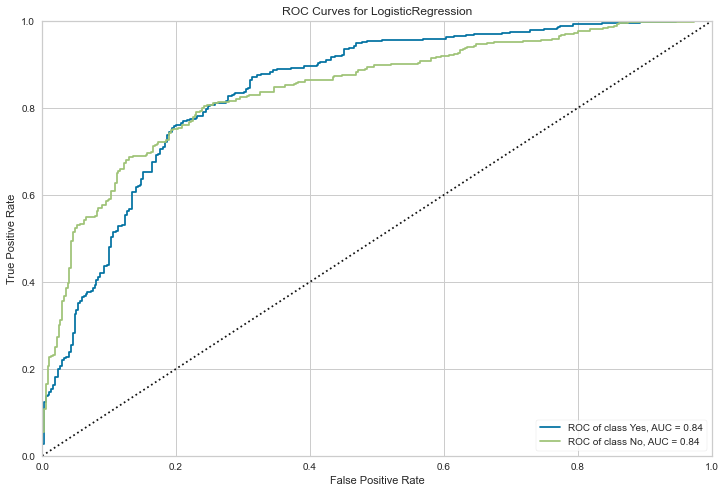

MODEL LEARNING CURVE


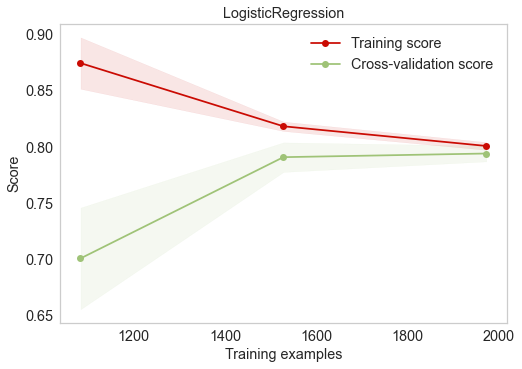

******************************************** DecisionTreeClassifier *****************************************************


Accuracy Score: 0.8378378378378378


SCORE: 0.8378378378378378


Confusion Matrix:


[[300  69]
 [ 51 320]]


Classification Report:


              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       369
         1.0       0.82      0.86      0.84       371

    accuracy                           0.84       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.84      0.84      0.84       740

Cross validation: 0.8435670604004356


ROC AUC CURVE:


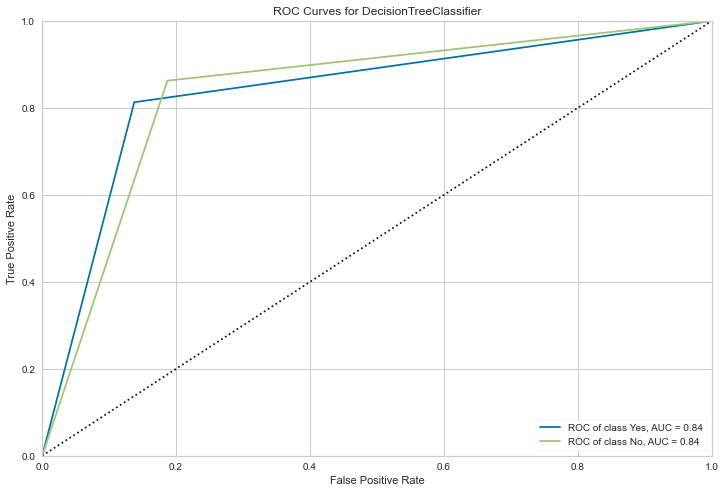

MODEL LEARNING CURVE


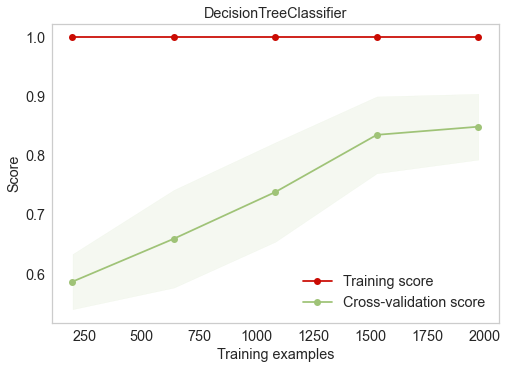

******************************************** ExtraTreesClassifier *****************************************************


Accuracy Score: 0.9581081081081081


SCORE: 0.9581081081081081


Confusion Matrix:


[[355  14]
 [ 17 354]]


Classification Report:


              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       369
         1.0       0.96      0.95      0.96       371

    accuracy                           0.96       740
   macro avg       0.96      0.96      0.96       740
weighted avg       0.96      0.96      0.96       740

Cross validation: 0.9495937002596968


ROC AUC CURVE:


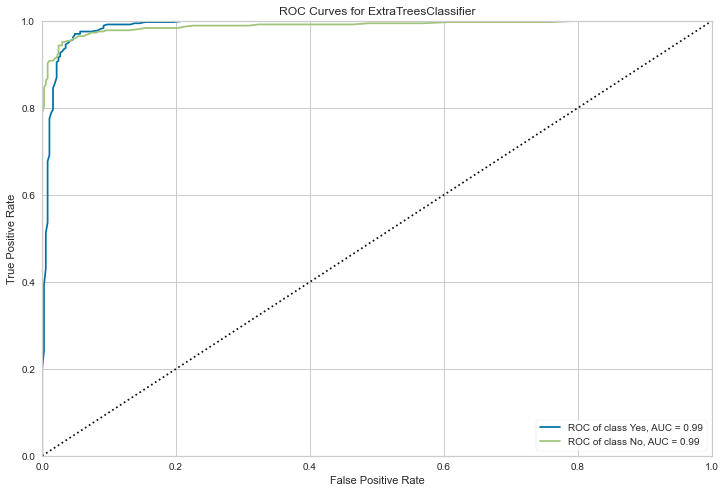

MODEL LEARNING CURVE


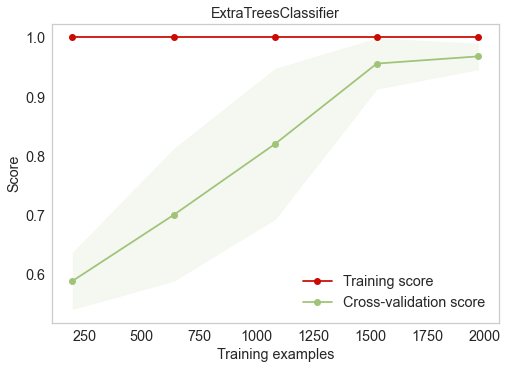

******************************************** RandomForestClassifier *****************************************************


Accuracy Score: 0.9364864864864865


SCORE: 0.9364864864864865


Confusion Matrix:


[[359  10]
 [ 37 334]]


Classification Report:


              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       369
         1.0       0.97      0.90      0.93       371

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740

Cross validation: 0.9275781184552232


ROC AUC CURVE:


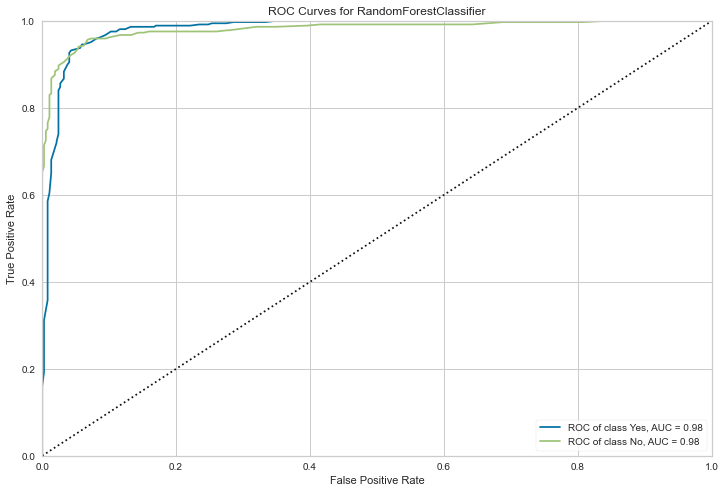

MODEL LEARNING CURVE


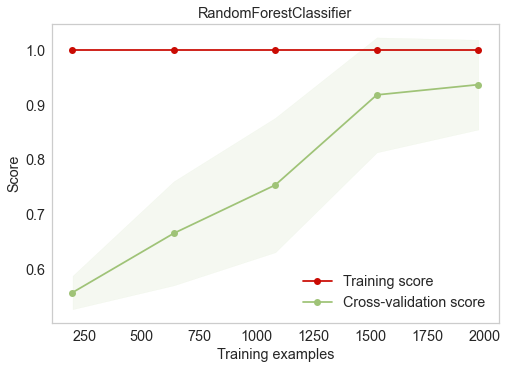

******************************************** KNeighborsClassifier *****************************************************


Accuracy Score: 0.7905405405405406


SCORE: 0.7905405405405406


Confusion Matrix:


[[227 142]
 [ 13 358]]


Classification Report:


              precision    recall  f1-score   support

         0.0       0.95      0.62      0.75       369
         1.0       0.72      0.96      0.82       371

    accuracy                           0.79       740
   macro avg       0.83      0.79      0.78       740
weighted avg       0.83      0.79      0.78       740

Cross validation: 0.7856111250733016


ROC AUC CURVE:


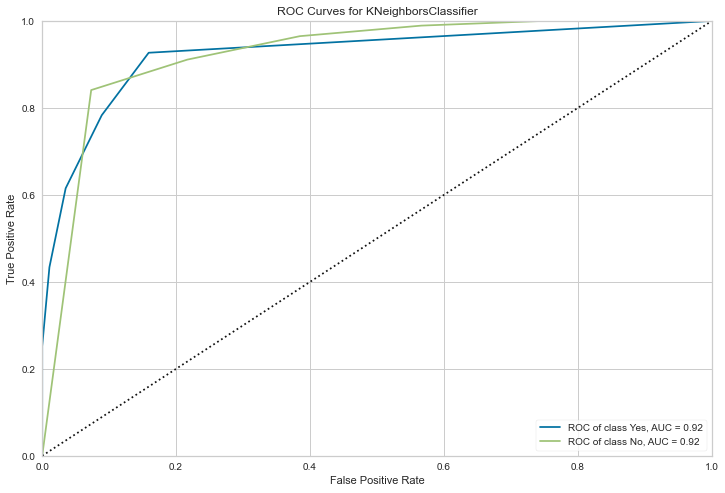

MODEL LEARNING CURVE


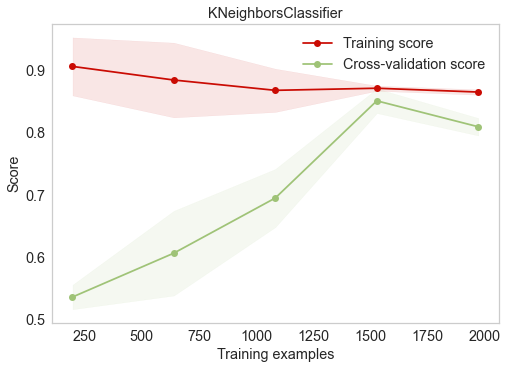

******************************************** XGBClassifier *****************************************************
[22:39:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy Score: 0.9310810810810811


SCORE: 0.9310810810810811


Confusion Matrix:


[[352  17]
 [ 34 337]]


Classification Report:


              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       369
         1.0       0.95      0.91      0.93       371

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740

[22:39:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in

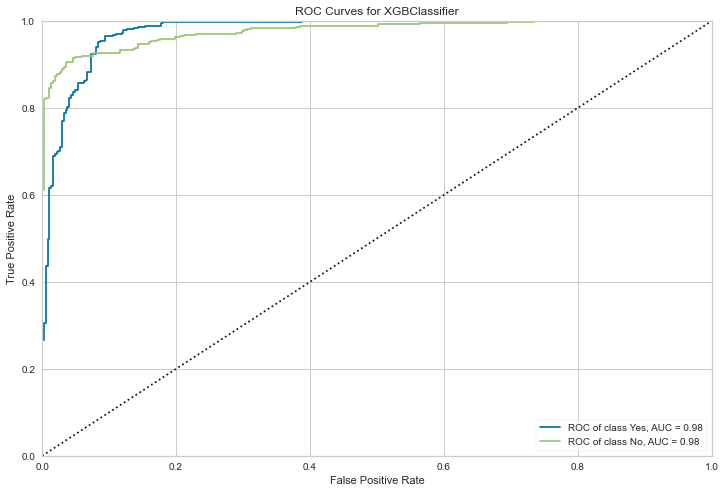

MODEL LEARNING CURVE
[22:39:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:54] WARNING: C:/Users/Administrator/worksp

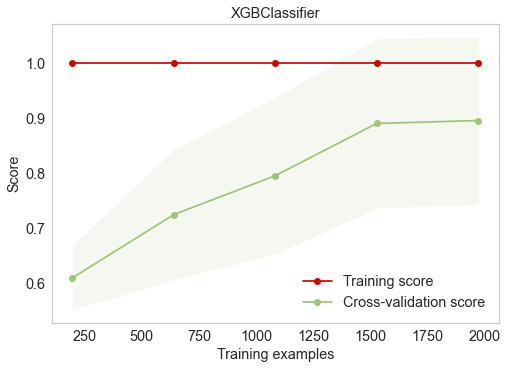

In [59]:
Score=[]
CVS=[]
MODEL=[]
for name, model in models.items():
    print('********************************************',name,'*****************************************************')
    MODEL.append(name)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('\n')
    ac=accuracy_score(y_test,y_pred)
    Score.append(ac)
    print('Accuracy Score:',ac)
    print('\n')
    print('SCORE:', model.score(X_test,y_test))
    print('\n')
    cm=confusion_matrix(y_test,y_pred)
    print('Confusion Matrix:')
    print('\n')
    print(cm)
    print('\n')
    print('Classification Report:')
    report=classification_report(y_test,y_pred)
    print('\n')
    print(report)
    cvs=cross_val_score(model,X_train, y_train, cv=skf).mean()
    CVS.append(cvs*100)
    print('Cross validation:',cvs)
    print('\n')
    print('ROC AUC CURVE:')
    plt.figure(figsize=(12,8))
    roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['Yes','No'],micro=False,macro=False)
    print('MODEL LEARNING CURVE')
    skplt.estimators.plot_learning_curve(model,x_new,y_new,cv=skf, scoring='accuracy', text_fontsize='large',title=name)
    plt.show()

# I will choose ExtraTrees because i am getting good accuracy and cross val score and good roc_auc

Accuracy Score: 0.9513513513513514


SCORE: 0.9513513513513514


Confusion Matrix:


[[351  18]
 [ 18 353]]


Classification Report:


              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       369
         1.0       0.95      0.95      0.95       371

    accuracy                           0.95       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.95      0.95      0.95       740

Cross validation: 0.9472715087542933

In [60]:
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose

In [61]:
etree=ExtraTreesClassifier()
etree.fit(X_train,y_train)

ExtraTreesClassifier()

# Extratree hyperparameter tuning

In [62]:
param={
 'bootstrap': [False,True],
 'criterion': ['gini','entropy'],
 'max_depth': [None,1,2,3],
 'max_leaf_nodes': [None,1,2,3],
 'max_samples': [None,1,2,3],
 'n_estimators':[100,200,300]
}

In [63]:
skfs=StratifiedKFold(n_splits=7)

In [64]:
grid=GridSearchCV(estimator=etree,param_grid=param,cv=skfs,n_jobs=-1)

In [65]:
grid.fit(x_new,y_new)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3],
                         'max_leaf_nodes': [None, 1, 2, 3],
                         'max_samples': [None, 1, 2, 3],
                         'n_estimators': [100, 200, 300]})

In [66]:
grid.best_score_

0.9712287535410766

# cross validation score increased to 97.12% from 94.72%

In [67]:
grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'n_estimators': 300}

# Now i am just putting values to now know about model performance to see metrics also

In [68]:
final_model=ExtraTreesClassifier(bootstrap= False,
 criterion= 'gini',
 max_depth= None,
 max_leaf_nodes= None,
 max_samples= None)

In [69]:
final_model.fit(X_train,y_train)

ExtraTreesClassifier()

In [70]:
y_pred1=final_model.predict(X_test)

# Final model roc_auc and learning curve

ROC AUC CURVE


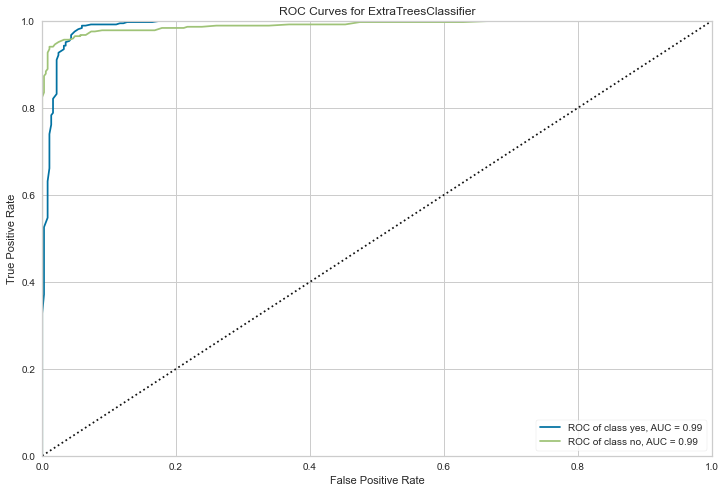

MODEL LEARNING CURVE


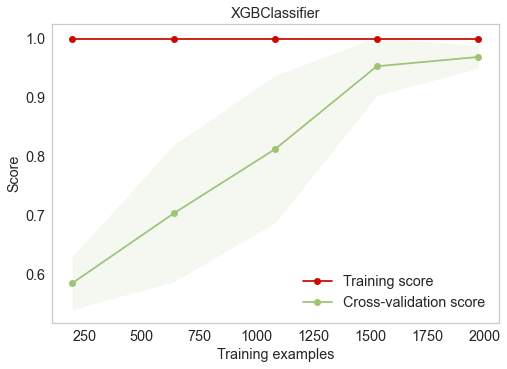

In [72]:
print("ROC AUC CURVE")
plt.figure(figsize=(12,8))
roc_auc(final_model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['yes','no'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(final_model,x_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
plt.show()

# Final model metrics

In [73]:
print("Accuracy Score:",accuracy_score(y_test,y_pred1))
print('\n')
print("Confusion matrix:")
print('\n')
print(confusion_matrix(y_test,y_pred1))
print('\n')
print("CLASSIFICATION REPORT:")
print('\n')
print(classification_report(y_test,y_pred1))

Accuracy Score: 0.9621621621621622


Confusion matrix:


[[357  12]
 [ 16 355]]


CLASSIFICATION REPORT:


              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       369
         1.0       0.97      0.96      0.96       371

    accuracy                           0.96       740
   macro avg       0.96      0.96      0.96       740
weighted avg       0.96      0.96      0.96       740



# Saving the gridsearch model as my main model

In [74]:
import joblib
joblib.dump(grid,'HRMODEL.obj')

['HRMODEL.obj']

# Loading model

In [75]:
model=joblib.load(r"C:\Users\Jeet Sarkar\Data Science PG Program\HRMODEL.obj")

In [76]:
model.predict(X_test)

array([0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0.

# Conclusion

1-In this dataset there were 35 columns

2-I did EDA to understand the attrition for all features

3-the data was imbalanced so i used smote because it balance the data synthetically so no rows repeat randomly

4-and then build multiple models where EXTRATREES was giving me good accuracy

5-then i did hyperparameter tuning and increase the Cross val score

6-and finally built a model the can predict the attrition with 97.12% accuracy